# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from string import Template
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating the DF
df = pd.DataFrame({"City":cities})
df["Lat"]= ""
df["Lng"]= ""
df["Max Temp"] = ""
df["Humidity"]= ""
df['Cloudiness'] = ""
df["Wind Speed"]= ""
df["Country"] = ""
df["Date"] = ""


In [4]:
# set up a parameters dictionary
params = {
    "units": "&units=Imperial",
    "key": "&appid=" + weather_api_key
}
api = Template("http://api.openweathermap.org/data/2.5/weather?q=${city}${units}${key}")

sets = 1
number = 1
print("Beginning Data Retrieval")
for index,row in df.iterrows():
    params["city"] = row['City']
    base_url = api.substitute(params)
    try:
        weather_response = requests.get(base_url).json()
        print(f"Processing Record {number} of Set {sets} | {row['City']}")
        
        df.loc[index, 'Lat'] = weather_response['coord']['lat']
        df.loc[index, 'Lng'] = weather_response['coord']['lon']
        df.loc[index, 'Max Temp'] = weather_response['main']['temp_max']
        df.loc[index, 'Humidity'] = weather_response['main']['humidity']
        df.loc[index, 'Cloudiness'] =weather_response["clouds"]["all"]
        df.loc[index, 'Wind Speed'] =weather_response['wind']['speed']
        df.loc[index, 'Country'] =weather_response['sys']['country']
        df.loc[index, 'Date'] =int(time.time()) 
        #
    except:
        print("City not found. Skipping...")
    number +=1 
    if number == 51:
        sets += 1
        number = 1
    
    

Beginning Data Retrieval
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | tazovskiy
Processing Record 5 of Set 1 | bodden town
Processing Record 6 of Set 1 | senanga
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | vestmanna
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | puntarenas
Processing Record 12 of Set 1 | tuatapere
Processing Record 13 of Set 1 | dibulla
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | joshimath
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | plettenberg bay
Processing Record 18 of Set 1 | mangan
Processing Record 19 of Set 1 | prince rupert
Processing Record 20 of Set 1 | loa janan
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | bethel
Pr

Processing Record 36 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | pangnirtung
Processing Record 39 of Set 4 | bredasdorp
Processing Record 40 of Set 4 | vastervik
City not found. Skipping...
Processing Record 41 of Set 4 | butaritari
Processing Record 42 of Set 4 | noumea
Processing Record 43 of Set 4 | north bend
Processing Record 44 of Set 4 | kahului
Processing Record 45 of Set 4 | clyde river
Processing Record 46 of Set 4 | ajdabiya
Processing Record 47 of Set 4 | nanchang
Processing Record 48 of Set 4 | iberia
Processing Record 49 of Set 4 | sao filipe
Processing Record 50 of Set 4 | zaragoza
Processing Record 1 of Set 5 | port-gentil
Processing Record 2 of Set 5 | safaga
Processing Record 3 of Set 5 | joigny
Processing Record 4 of Set 5 | mendahara
City not found. Skipping...
Processing Record 5 of Set 5 | bandar
Processing Record 6 of Set 5 | cabinda
Processing Record 7 of Set 5 | isangel
Proc

Processing Record 23 of Set 8 | tolcsva
Processing Record 24 of Set 8 | vanavara
Processing Record 25 of Set 8 | ocara
Processing Record 26 of Set 8 | tuy hoa
Processing Record 27 of Set 8 | chelno-vershiny
Processing Record 28 of Set 8 | hofn
Processing Record 29 of Set 8 | mahebourg
Processing Record 30 of Set 8 | bilma
Processing Record 31 of Set 8 | birao
Processing Record 32 of Set 8 | roald
Processing Record 33 of Set 8 | sheffield
Processing Record 34 of Set 8 | kafue
Processing Record 35 of Set 8 | saint-augustin
Processing Record 36 of Set 8 | baykit
Processing Record 37 of Set 8 | farakka
Processing Record 38 of Set 8 | gisors
Processing Record 39 of Set 8 | japura
Processing Record 40 of Set 8 | waitati
Processing Record 41 of Set 8 | mapimi
Processing Record 42 of Set 8 | tefe
Processing Record 43 of Set 8 | coahuayana
Processing Record 44 of Set 8 | namibe
Processing Record 45 of Set 8 | tubruq
City not found. Skipping...
Processing Record 46 of Set 8 | sur
Processing Reco

Processing Record 14 of Set 12 | shahe
Processing Record 15 of Set 12 | belyy yar
Processing Record 16 of Set 12 | sinkat
City not found. Skipping...
Processing Record 17 of Set 12 | paso de carrasco
Processing Record 18 of Set 12 | diu
Processing Record 19 of Set 12 | carroll
Processing Record 20 of Set 12 | gusau
Processing Record 21 of Set 12 | lismore
Processing Record 22 of Set 12 | mogadishu
Processing Record 23 of Set 12 | maragogi
Processing Record 24 of Set 12 | kidal
Processing Record 25 of Set 12 | kamenka
Processing Record 26 of Set 12 | terrace
Processing Record 27 of Set 12 | portree
Processing Record 28 of Set 12 | oistins
Processing Record 29 of Set 12 | elk city
Processing Record 30 of Set 12 | sosnovo-ozerskoye
Processing Record 31 of Set 12 | coquimbo
Processing Record 32 of Set 12 | kemijarvi
Processing Record 33 of Set 12 | sayyan
Processing Record 34 of Set 12 | isla vista
Processing Record 35 of Set 12 | bandraboua
Processing Record 36 of Set 12 | manga
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df=df.replace('',np.nan).dropna(axis = 0, how = 'any')
df.reset_index()
df.to_csv(output_data_file,index=False)


In [6]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,20.169837,15.474342,52.215520,72.149915,50.109029,8.166235,1.614650e+09
std,32.745907,91.792662,30.265673,20.964573,40.494364,5.686459,5.902987e+01
min,-54.800000,-175.200000,-37.910000,1.000000,0.000000,0.070000,1.614650e+09
25%,-6.586550,-67.534600,35.105000,63.000000,1.000000,3.830000,1.614650e+09
50%,22.566700,17.076200,61.770000,77.000000,53.000000,6.620000,1.614650e+09
75%,47.764950,96.249250,76.035000,88.000000,90.000000,11.500000,1.614650e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,34.160000,1.614650e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_grt_100 = df[df["Humidity"] > 100]
humidity_grt_100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

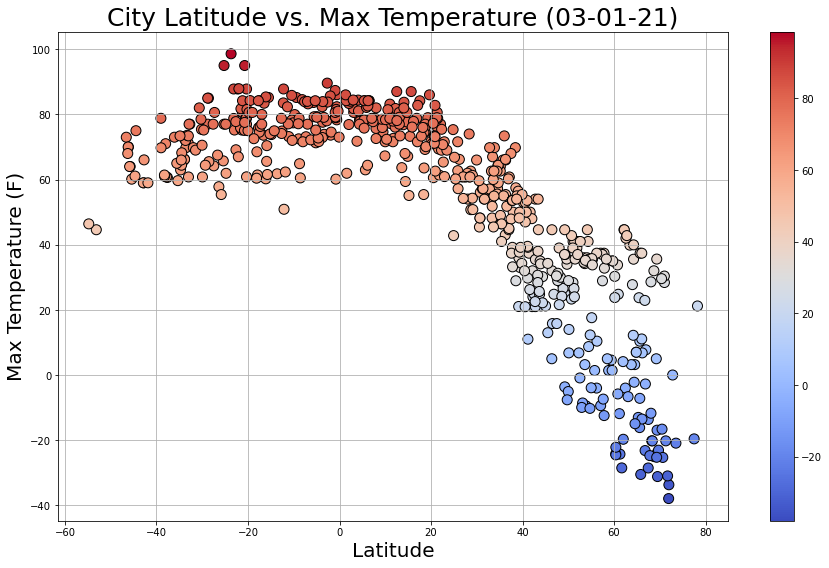

In [10]:
latitues = df['Lat']
temps = df['Max Temp']

plt.figure(figsize=(15,9))
plt.grid()
today = datetime.today().strftime('%m-%d-%y')
plt.title(f"City Latitude vs. Max Temperature ({today})", fontsize=25)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (F)",fontsize=20)
ax = plt.scatter(latitues, temps, s=100, c=temps, cmap='coolwarm', edgecolors="black" )
plt.colorbar()
plt.savefig("Temp_city.png")

## Latitude vs. Humidity Plot

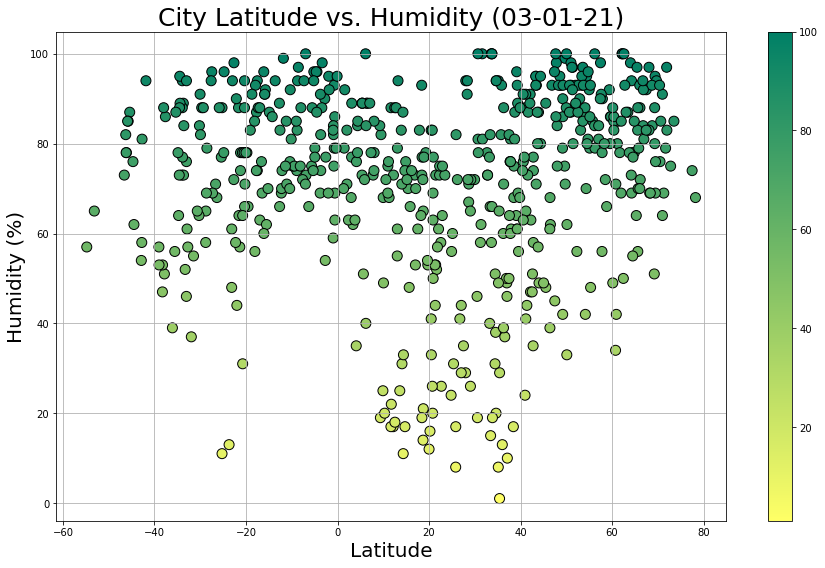

In [11]:
latitues = df['Lat']
humidity  = df['Humidity']

plt.figure(figsize=(15,9))
plt.grid()
today = datetime.today().strftime('%m-%d-%y')
plt.title(f"City Latitude vs. Humidity ({today})", fontsize=25)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)",fontsize=20)
ax = plt.scatter(latitues, humidity, s=100, c=humidity, cmap='summer_r', edgecolors="black" )
plt.colorbar()
plt.savefig("Humidity_city.png")

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression